In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import sklearn
import math
import seaborn as sns
from io import StringIO

In [4]:
datafile = 'HR_Employee_Attrition_Data.csv'
df=pd.read_csv(datafile)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.shape

(2940, 35)

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

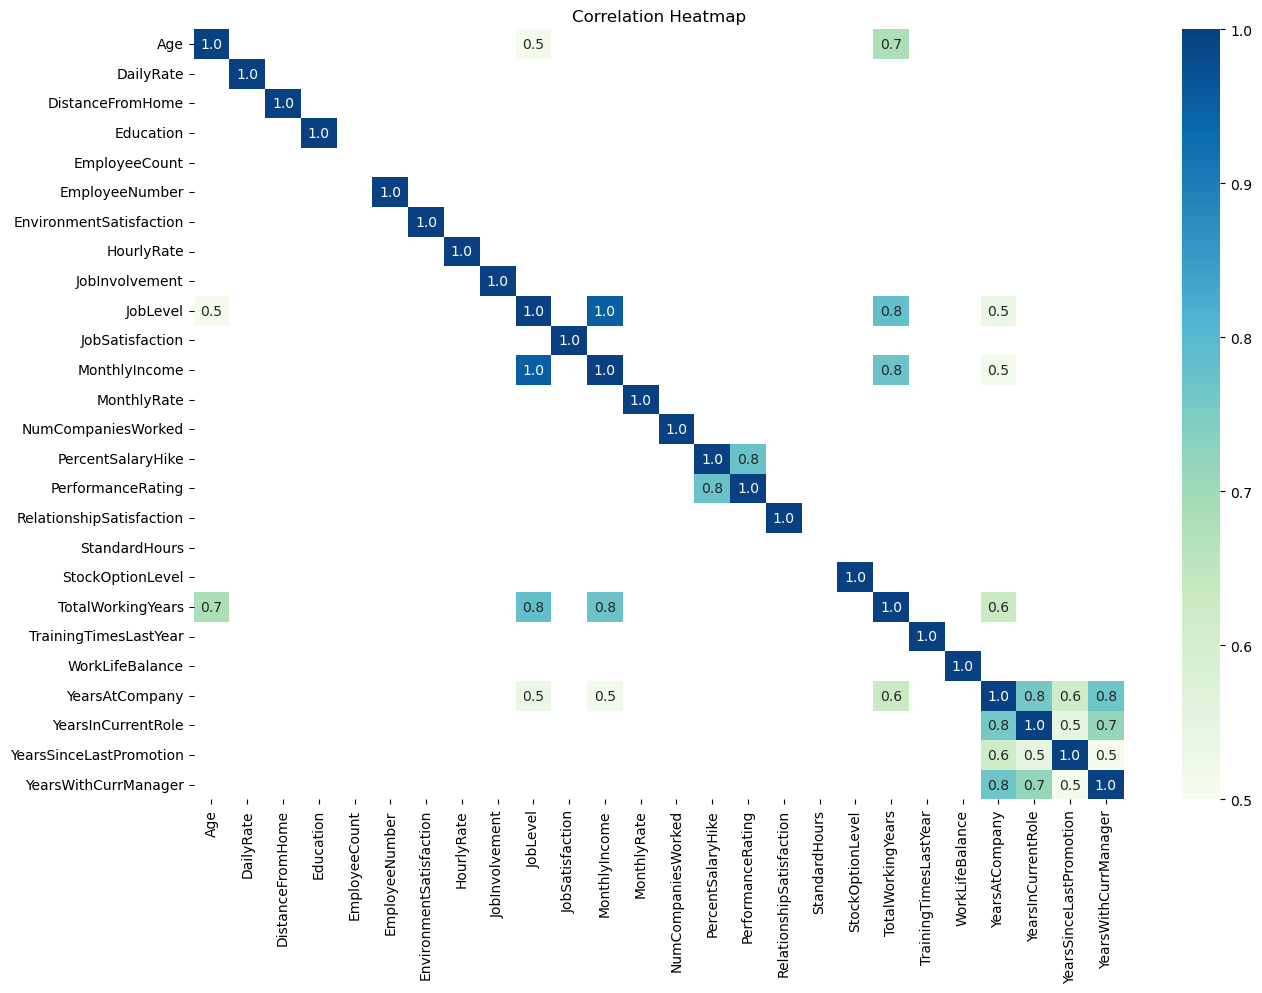

In [11]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = df.iloc[:, :].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

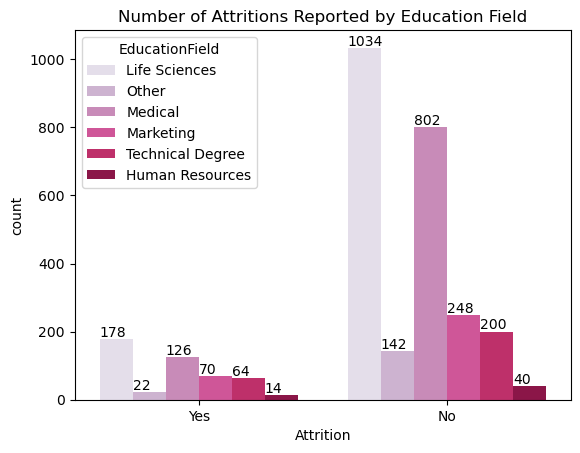

In [12]:
ax = sns.countplot(x=df['Attrition'],
              hue='EducationField',
              data=df, palette = 'PuRd')
plt.title("Number of Attritions Reported by Education Field")

for patch in ax.patches:
    h = patch.get_height()
    x = patch.get_x()
    ax.annotate(h, (x+0, h+7))
    
plt.show()

In [13]:
# replacing attrition Yes=1 and No = 0
Num_val = {'Yes':1, 'No':0}
df['Attrition'] = df["Attrition"].apply(lambda x: Num_val[x])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [14]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size() / df.groupby(["EducationField"]).size()

EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
dtype: float64

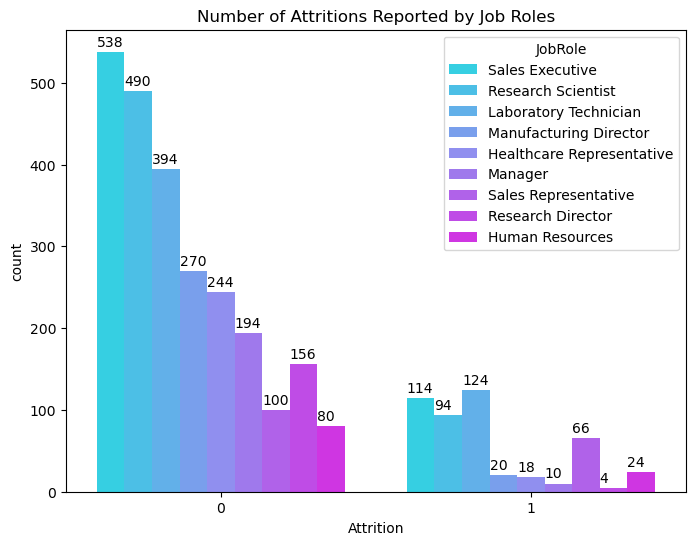

In [15]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

ax=sns.countplot(x=df['Attrition'],
              hue='JobRole',
              data=df, 
              palette = 'cool')
plt.title("Number of Attritions Reported by Job Roles")
for patch in ax.patches:
    h = patch.get_height()
    x = patch.get_x()
    ax.annotate(h, (x+0, h+7))
    
plt.show()

In [16]:
# replacing Overtime Yes=1 and No = 0
Num_val2 = {'Yes':1, 'No':0}
df['OverTime'] = df["OverTime"].apply(lambda x: Num_val2[x])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [17]:
df[(df["Attrition"] == 1)].groupby(["OverTime"]).size() / df.groupby(["OverTime"]).size()

OverTime
0    0.104364
1    0.305288
dtype: float64

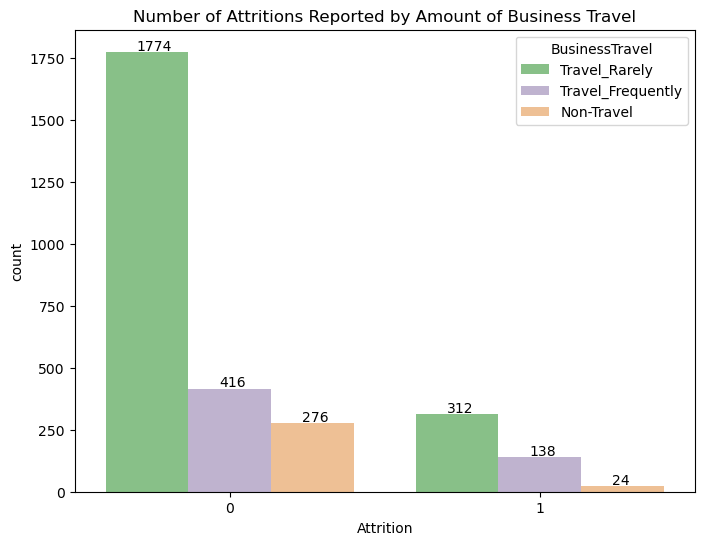

In [18]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

ax= sns.countplot(x=df['Attrition'],
              hue='BusinessTravel',
              data=df, 
              palette = 'Accent')
plt.title("Number of Attritions Reported by Amount of Business Travel")

for patch in ax.patches:
    h = patch.get_height()
    x = patch.get_x()
    ax.annotate(h, (x+0.1, h+7))
    
plt.show()

In [19]:
df[(df["Attrition"] == 1)].groupby(["BusinessTravel"]).size() / df.groupby(["BusinessTravel"]).size()

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
dtype: float64

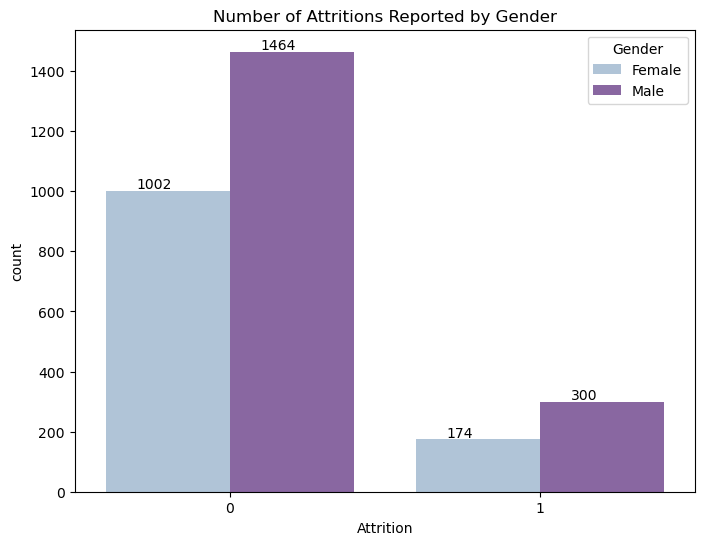

In [20]:
ax = sns.countplot(x=df['Attrition'],
              hue='Gender',
              data=df, palette = 'BuPu')
plt.title("Number of Attritions Reported by Gender")

for patch in ax.patches:
    h = patch.get_height()
    x = patch.get_x()
    ax.annotate(h, (x+0.1, h+7))
    
plt.show()

In [21]:
df[(df["Attrition"]==1)].groupby(["Gender"]).size()/df.groupby(['Gender']).size()

Gender
Female    0.147959
Male      0.170068
dtype: float64

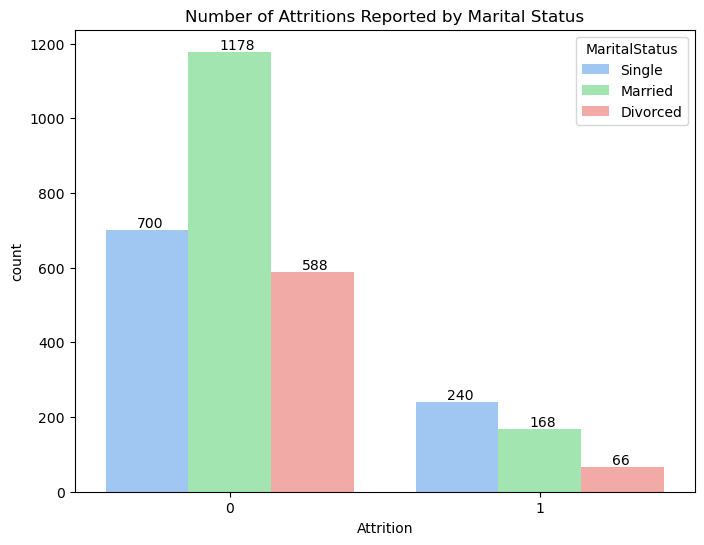

In [22]:
ay =sns.countplot(x=df['Attrition'],
             hue='MaritalStatus',
             data=df)
plt.title("Number of Attritions Reported by Marital Status")

for patch in ay.patches:
    h = patch.get_height()
    x = patch.get_x()
    ay.annotate(h, (x+0.1, h+7))

In [23]:
df[(df["Attrition"]==1)].groupby(["MaritalStatus"]).size()/df.groupby(['MaritalStatus']).size()

MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
dtype: float64

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


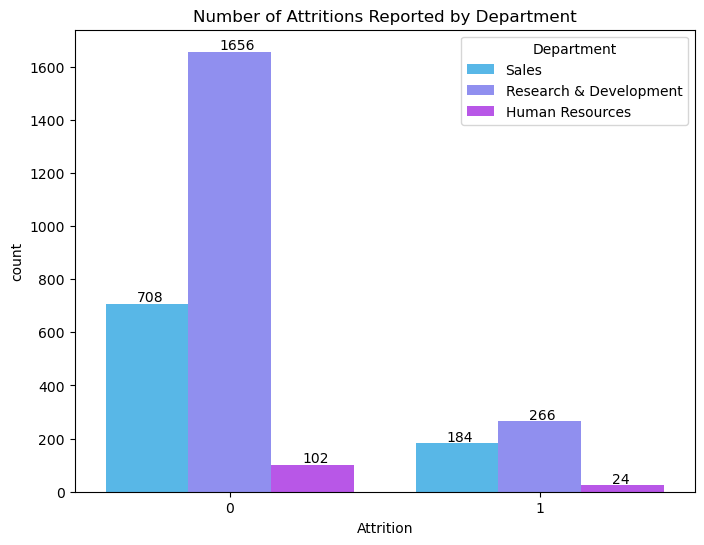

In [25]:
az=sns.countplot(x=df["Attrition"],
             hue= "Department",
             data = df,
             palette='cool')
plt.title("Number of Attritions Reported by Department")

for patch in az.patches:
    h = patch.get_height()
    x = patch.get_x()
    az.annotate(h, (x+0.1, h+7))

In [26]:
df[(df["Attrition"]==1)].groupby(["Department"]).size()/df.groupby(['Department']).size()

Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
dtype: float64

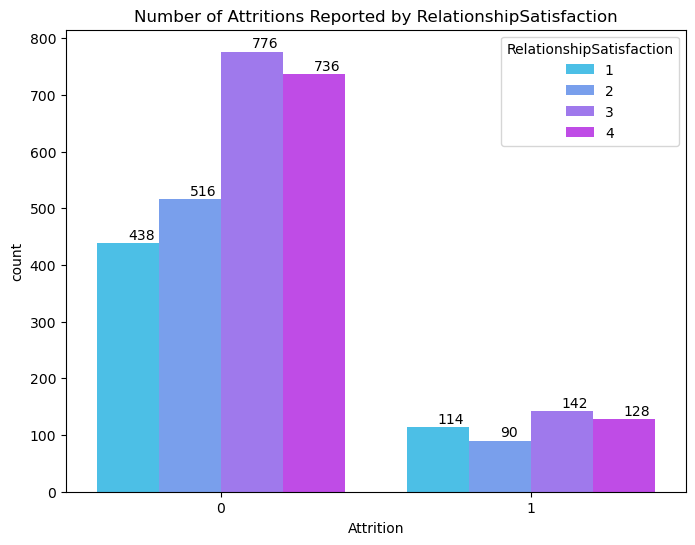

In [27]:
ax=sns.countplot(x=df['Attrition'],
             hue = "RelationshipSatisfaction",
             data = df,
             palette="cool")
plt.title("Number of Attritions Reported by RelationshipSatisfaction")

for patch in ax.patches:
    h = patch.get_height()
    x = patch.get_x()
    ax.annotate(h, (x+0.1, h+7))
    
plt.show()

In [28]:
df[(df["Attrition"]==1)].groupby(["RelationshipSatisfaction"]).size()/df.groupby(['RelationshipSatisfaction']).size()

RelationshipSatisfaction
1    0.206522
2    0.148515
3    0.154684
4    0.148148
dtype: float64

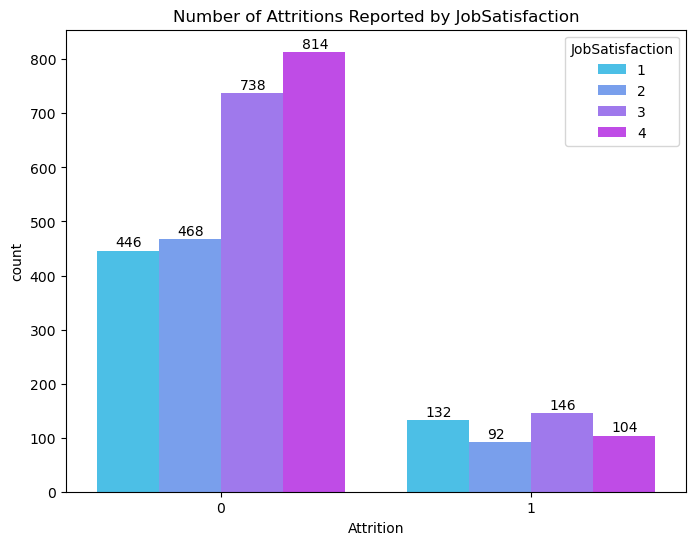

In [29]:
ax=sns.countplot(x=df['Attrition'],
             hue = "JobSatisfaction",
             data = df,
             palette="cool")
plt.title("Number of Attritions Reported by JobSatisfaction")

for patch in ax.patches:
    h = patch.get_height()
    x = patch.get_x()
    ax.annotate(h, (x+0.06, h+7))
    
plt.show()

In [30]:
df[(df["Attrition"] == 1)].groupby(["JobRole"]).size() / df.groupby(["JobRole"]).size()

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
dtype: float64

In [31]:
temp=df.columns.values
temp

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [32]:
# replacing character to binary 1 and 0

def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['Attrition']= le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel']= le.fit_transform(res_df['BusinessTravel'])
    res_df['Department']= le.fit_transform(res_df['Department'])
    res_df['EducationField']= le.fit_transform(res_df['EducationField'])
    res_df['Gender']= le.fit_transform(res_df['Gender'])
    res_df['JobRole']= le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus']= le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime']= le.fit_transform(res_df['OverTime'])
    return res_df

In [33]:
encoded_df=preprocessor(df)
encoded_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,5,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,0,1,884,1,23,2,3,1,2936,...,3,80,1,17,3,3,5,2,0,3
2936,39,0,2,613,1,6,1,3,1,2937,...,1,80,1,9,5,3,7,7,1,7
2937,27,0,2,155,1,4,3,1,1,2938,...,2,80,1,6,0,3,6,2,0,3
2938,49,0,1,1023,2,2,3,3,1,2939,...,4,80,0,17,3,2,9,6,0,8


<AxesSubplot:>

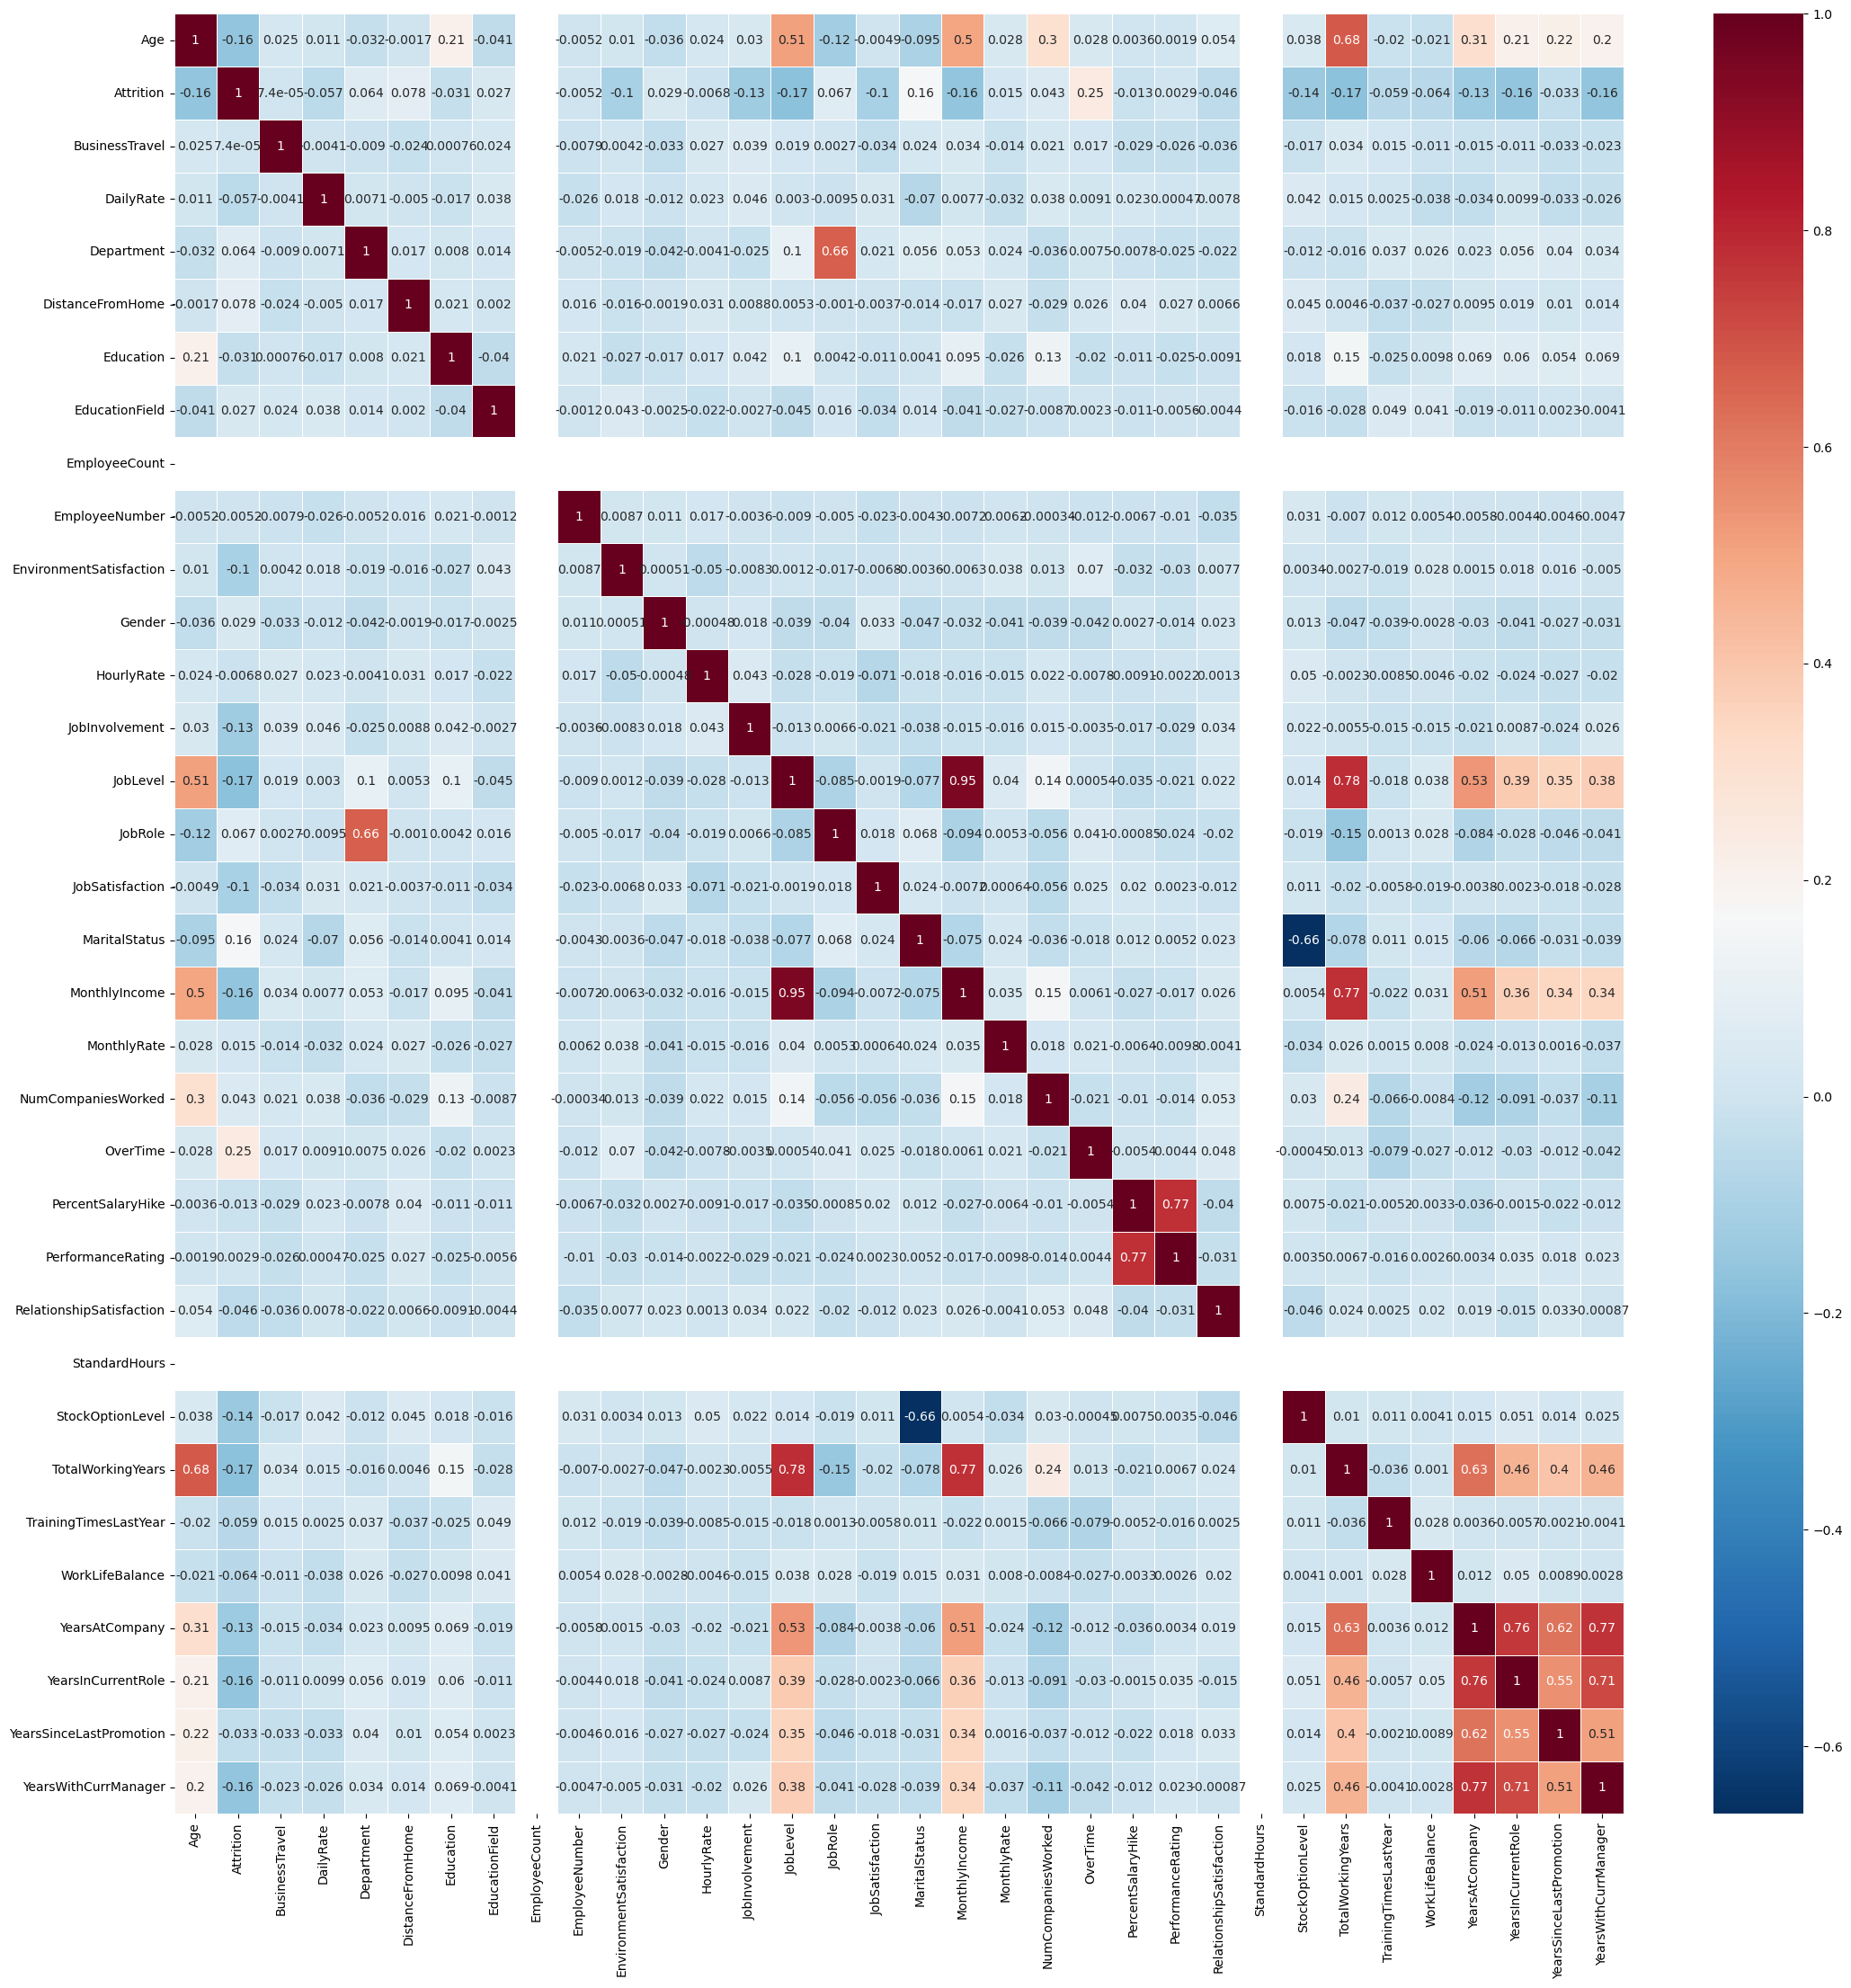

In [34]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = encoded_df.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [35]:
# Picking the features that have absolute correlation value greater than 0.1 

final_df = encoded_df[['Attrition', 'Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [36]:
# Separating dataset into x & y, where y is the target variable

x= final_df.drop(['Attrition'], axis=1).values
y= final_df['Attrition'].values

In [37]:
# Split the data into train test

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [38]:
# Build the decision tree model
# Desicion tree using depth =2

model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train, y_train)
print('Training score is:', model_dt_2_score_train)
model_dt_2.fit(x_test, y_test)
model_dt_2_score_test= model_dt_2.score(x_test, y_test)
print('Testing score is:', model_dt_2_score_test)

Training score is: 0.8452380952380952
Testing score is: 0.8758503401360545


In [39]:
# Desicion tree using depth =4

model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train,y_train)
model_dt_4_score_train=model_dt_4.score(x_train, y_train)
print('Training score is:', model_dt_4_score_train)
model_dt_4.fit(x_test, y_test)
model_dt_4_score_test= model_dt_4.score(x_test, y_test)
print('Testing score is:', model_dt_4_score_test)

Training score is: 0.8618197278911565
Testing score is: 0.9081632653061225


In [40]:
# Desicion tree using depth =6

model_dt_6 = DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_leaf=20, min_samples_split=100)
model_dt_6.fit(x_train,y_train)
model_dt_6_score_train=model_dt_6.score(x_train, y_train)
print('Training score is:', model_dt_6_score_train)
model_dt_6.fit(x_test, y_test)
model_dt_6_score_test= model_dt_6.score(x_test, y_test)
print('Testing score is:', model_dt_6_score_test)

Training score is: 0.8690476190476191
Testing score is: 0.8724489795918368


In [41]:
# Desicion tree using depth =8

model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, min_samples_leaf=80, min_samples_split=200)
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train=model_dt_8.score(x_train, y_train)
print('Training score is:', model_dt_8_score_train)
model_dt_8.fit(x_test, y_test)
model_dt_8_score_test= model_dt_8.score(x_test, y_test)
print('Testing score is:', model_dt_8_score_test)

Training score is: 0.8397108843537415
Testing score is: 0.8622448979591837


In [42]:
# Desicion tree using depth =8

model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, min_samples_leaf=30, min_samples_split=100)
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train=model_dt_8.score(x_train, y_train)
print('Training score is:', model_dt_8_score_train)
model_dt_8.fit(x_test, y_test)
model_dt_8_score_test= model_dt_8.score(x_test, y_test)
print('Testing score is:', model_dt_8_score_test)

Training score is: 0.8703231292517006
Testing score is: 0.8724489795918368


In [43]:
# Desicion tree using depth =4

model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_leaf=120, min_samples_split=300)
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train=model_dt_8.score(x_train, y_train)
print('Training score is:', model_dt_8_score_train)
model_dt_8.fit(x_test, y_test)
model_dt_8_score_test= model_dt_8.score(x_test, y_test)
print('Testing score is:', model_dt_8_score_test)

Training score is: 0.8397108843537415
Testing score is: 0.8622448979591837


In [44]:
# Desicion tree using depth =8

model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=10, min_samples_leaf=100, min_samples_split=1000)
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train=model_dt_8.score(x_train, y_train)
print('Training score is:', model_dt_8_score_train)
model_dt_8.fit(x_test, y_test)
model_dt_8_score_test= model_dt_8.score(x_test, y_test)
print('Testing score is:', model_dt_8_score_test)

Training score is: 0.8358843537414966
Testing score is: 0.8622448979591837


In [45]:
# Desicion tree using depth =8

model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, min_samples_leaf=30, min_samples_split=100)
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train=model_dt_8.score(x_train, y_train)
print('Training score is:', model_dt_8_score_train)
model_dt_8.fit(x_test, y_test)
model_dt_8_score_test= model_dt_8.score(x_test, y_test)
print('Testing score is:', model_dt_8_score_test)

#y_pred_dt = model_dt_8.predict_proba(x_test)[:, 1]
#print("Probability is: ", y_pred_dt)

Training score is: 0.8703231292517006
Testing score is: 0.8724489795918368


In [46]:
# Decision Tree

model_dt = DecisionTreeClassifier(random_state=1, max_depth=8, min_samples_leaf=30, min_samples_split=100)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt_8.predict_proba(x_test)[:, 1]

In [47]:
#Performance matrix

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_dt

0.8029804952881876

In [48]:
predictions = model_dt.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
y_actual_result = None
for i in range(len(predictions)):
    if(predictions[i]==1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))


In [50]:
# Recall

y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
    if (result==1):
        count = count+1
print('True yes|Predicted yes:')
print(count/float(len(y_actual_result)))

True yes|Predicted yes:
0.47368421052631576


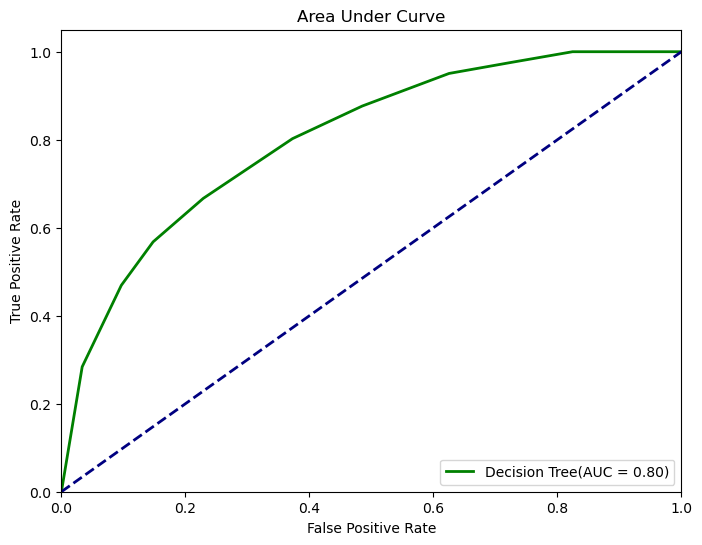

In [51]:
# Area under the Curve

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
# Confusion Matrix

print(confusion_matrix(y_test, predictions))

[[478  29]
 [ 54  27]]


In [53]:
accuracy_score(y_test, predictions)

0.858843537414966

In [54]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

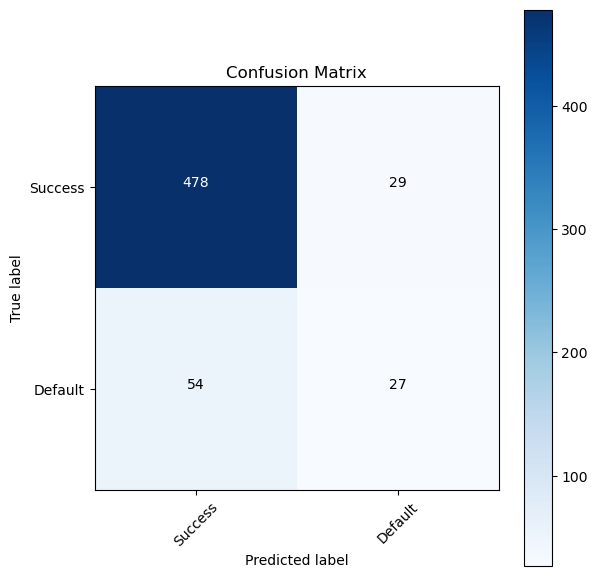

In [55]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()